In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import datetime 
from datetime import timedelta, datetime
import warnings
warnings.filterwarnings('ignore')

In [26]:
df_cases_time = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_time.csv",parse_dates=['Last_Update'])

In [27]:
df_cases_time.rename(columns = {"Country_Region" :"Country", "Last_Update":"Date"}, inplace = True)

In [28]:
df_global = df_cases_time.drop(["Recovered","Active","Delta_Recovered","People_Tested",
                          "People_Hospitalized","Province_State","FIPS","UID","iso3","Report_Date_String",
                          "Country","Incident_Rate","Delta_Confirmed","Delta_Deaths"], axis =1)

In [29]:
df = df_cases_time.drop(["Recovered","Active","Delta_Recovered","People_Tested",
                          "People_Hospitalized","Province_State","FIPS","UID","iso3","Report_Date_String",
                          "Incident_Rate","Delta_Confirmed","Delta_Deaths"], axis =1)
df_us = df[df['Country']=='US']
df_us = df_us.groupby("Date")[["Confirmed","Deaths"]].sum().reset_index()
df_us.head()

,Date,Confirmed,Deaths
0,2020-01-22,2,0
1,2020-01-23,2,0
2,2020-01-24,4,0
3,2020-01-25,4,0
4,2020-01-26,10,0


In [30]:
df_global = df_global.groupby("Date")[["Confirmed","Deaths"]].sum().reset_index()
df_global.head()

,Date,Confirmed,Deaths
0,2020-01-22,556,17
1,2020-01-23,655,18
2,2020-01-24,943,26
3,2020-01-25,1436,42
4,2020-01-26,2123,56


In [31]:
print("Basic Information")
print("Total number of Confirmed cases around the world",df_global["Confirmed"].iloc[-1])
print("Total number of Death cases around the world",df_global["Deaths"].iloc[-1])

Basic Information
Total number of Confirmed cases around the world 45605725
Total number of Death cases around the world 1295765


In [32]:
confirmed = df_global.iloc[:, [0,1]]
deaths = df_global.iloc[:, [0,2]]

In [33]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=confirmed['Date'], y=confirmed['Confirmed'], mode='lines+markers', name ='Confirmed'))
fig.add_trace(go.Scatter(x=deaths['Date'], y=deaths['Deaths'], mode='lines+markers', name ='Deaths'))
fig.update_layout(title = 'Worldwide COVID-19 Cases', xaxis_tickfont_size=14, yaxis_title='Number of Cases')
fig.show()

In [34]:
confirmed_us = df_us.iloc[:, [0,1]]
deaths_us = df_us.iloc[:, [0,2]]

In [35]:
print("Basic Information")
print("Total number of Confirmed cases around the world",df_us["Confirmed"].iloc[-1])
print("Total number of Death cases around the world",df_us["Deaths"].iloc[-1])

Basic Information
Total number of Confirmed cases around the world 15608398
Total number of Death cases around the world 430170


In [36]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=confirmed_us['Date'], y=confirmed_us['Confirmed'], mode='lines+markers', name ='Confirmed'))
fig.add_trace(go.Scatter(x=deaths_us['Date'], y=deaths_us['Deaths'], mode='lines+markers', name ='Deaths'))
fig.update_layout(title = 'COVID-19 Cases in United States', xaxis_tickfont_size=14, yaxis_title='Number of Cases')
fig.show()

Average increase in number of Confirmed cases everyday: 172095.0
Average increase in number of Death cases everyday: 4890.0


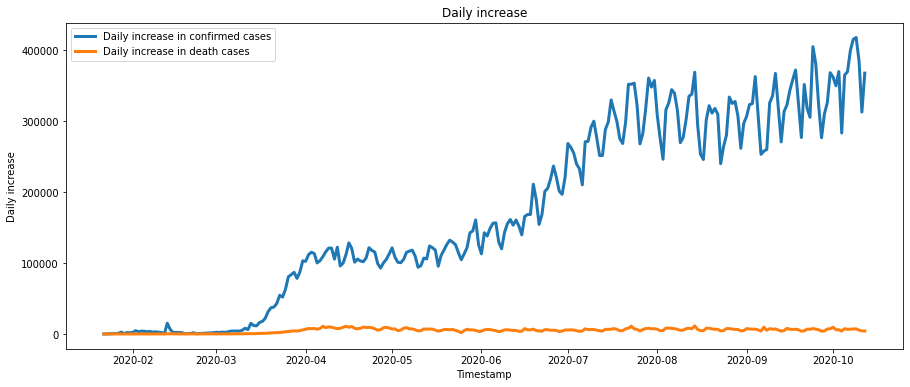

In [37]:
print("Average increase in number of Confirmed cases everyday:",np.round(df_global["Confirmed"].diff().fillna(0).mean()))
print("Average increase in number of Death cases everyday:",np.round(df_global["Deaths"].diff().fillna(0).mean()))

plt.figure(figsize=(15,6))
plt.plot(df_global["Date"], df_global["Confirmed"].diff().fillna(0), label="Daily increase in confirmed cases", linewidth=3)
plt.plot(df_global["Date"], df_global["Deaths"].diff().fillna(0), label="Daily increase in death cases", linewidth=3)
plt.xlabel("Timestamp")
plt.ylabel("Daily increase")
plt.title("Daily increase")
plt.legend()
plt.savefig('img/dailyglobal.png')


Average increase in number of Confirmed cases everyday: 58900.0
Average increase in number of Death cases everyday: 1623.0


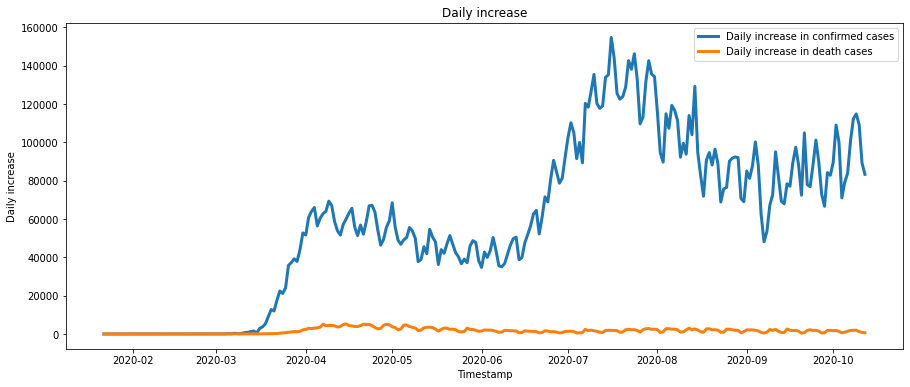

In [38]:
print("Average increase in number of Confirmed cases everyday:",np.round(df_us["Confirmed"].diff().fillna(0).mean()))
print("Average increase in number of Death cases everyday:",np.round(df_us["Deaths"].diff().fillna(0).mean()))

plt.figure(figsize=(15,6))
plt.plot(df_us["Date"], df_us["Confirmed"].diff().fillna(0), label="Daily increase in confirmed cases", linewidth=3)
plt.plot(df_us["Date"], df_us["Deaths"].diff().fillna(0), label="Daily increase in death cases", linewidth=3)
plt.xlabel("Timestamp")
plt.ylabel("Daily increase")
plt.title("Daily increase")
plt.legend()
plt.savefig('img/dailyus.png')

In [39]:
countrywise = df_cases_time[df_cases_time["Date"]==df_cases_time["Date"].max()].groupby("Country")[["Confirmed","Deaths"]].sum().sort_values(["Confirmed"],ascending=False).reset_index()
countrywise["MotalityRate"] = countrywise.Deaths/countrywise.Confirmed*100
# countrywise["MotalityRate"] = countrywise["MotalityRate"].map("{:.2}".format)
countrywise.head()


,Country,Confirmed,Deaths,MotalityRate
0,US,15608398,430170,2.756016
1,India,7175880,109856,1.530906
2,Brazil,5103408,150689,2.952713
3,Russia,1305093,22594,1.731218
4,Colombia,919084,27985,3.044879


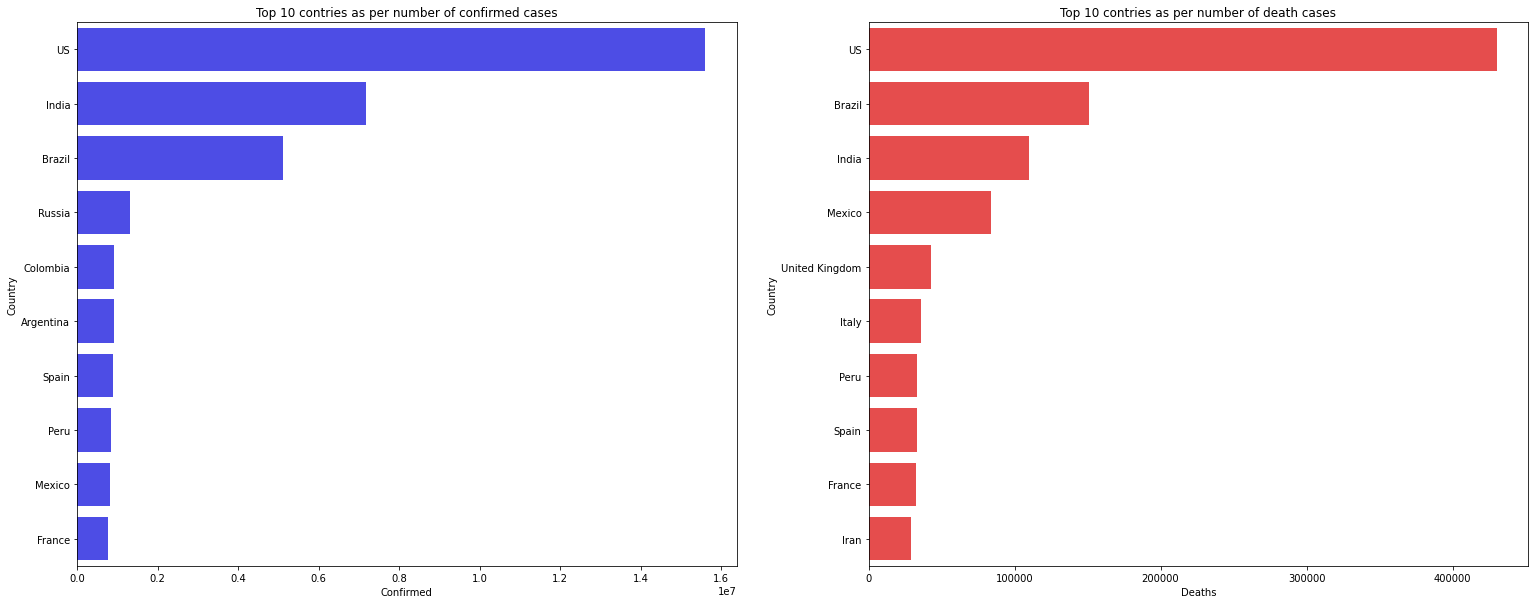

In [40]:
fig1, (ax1,ax2) = plt.subplots(1,2,figsize=(26,10))
top_10confirmed = countrywise.sort_values(["Confirmed"],ascending=False).head(10)
top_10deaths = countrywise.sort_values(["Deaths"],ascending=False).head(10)

sns.barplot(x=top_10confirmed["Confirmed"], y=top_10confirmed["Country"],color='b',alpha=0.8,ax=ax1)
ax1.set_title("Top 10 contries as per number of confirmed cases")
sns.barplot(x=top_10deaths["Deaths"], y=top_10deaths["Country"],color='r',alpha=0.8,ax=ax2)
ax2.set_title("Top 10 contries as per number of death cases")
fig1.savefig("img/global_confirm_death.png")

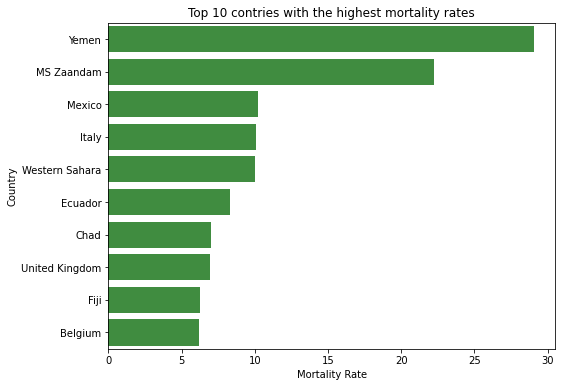

In [41]:
fig2, (ax1) = plt.subplots(1,figsize=(8,6))
top_10MotalityRate = countrywise.sort_values(["MotalityRate"],ascending=False).head(10)
sns.barplot(x=top_10MotalityRate["MotalityRate"], y=top_10MotalityRate["Country"],color='g',alpha=0.8,ax=ax1)
ax1.set_title("Top 10 contries with the highest mortality rates")
ax1.set(xlabel='Mortality Rate', ylabel='Country')
fig2.savefig("img/global_mortality.png")

In [42]:
us_states = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv')
us_states.head()

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


In [43]:
us_states = us_states.groupby("state")[["cases","deaths"]].sum().reset_index()
us_states.rename(columns = {"state" :"State", "cases":"Confirmed", "deaths":"Deaths"}, inplace = True)
us_states["MotalityRate"] = us_states.Deaths/us_states.Confirmed*100
us_states.head()

,State,Confirmed,Deaths,MotalityRate
0,Alabama,12738090,242196,1.901353
1,Alaska,604023,3976,0.658253
2,Arizona,20896942,510451,2.442707
3,Arkansas,6457934,90275,1.397893
4,California,72144684,1502541,2.082677


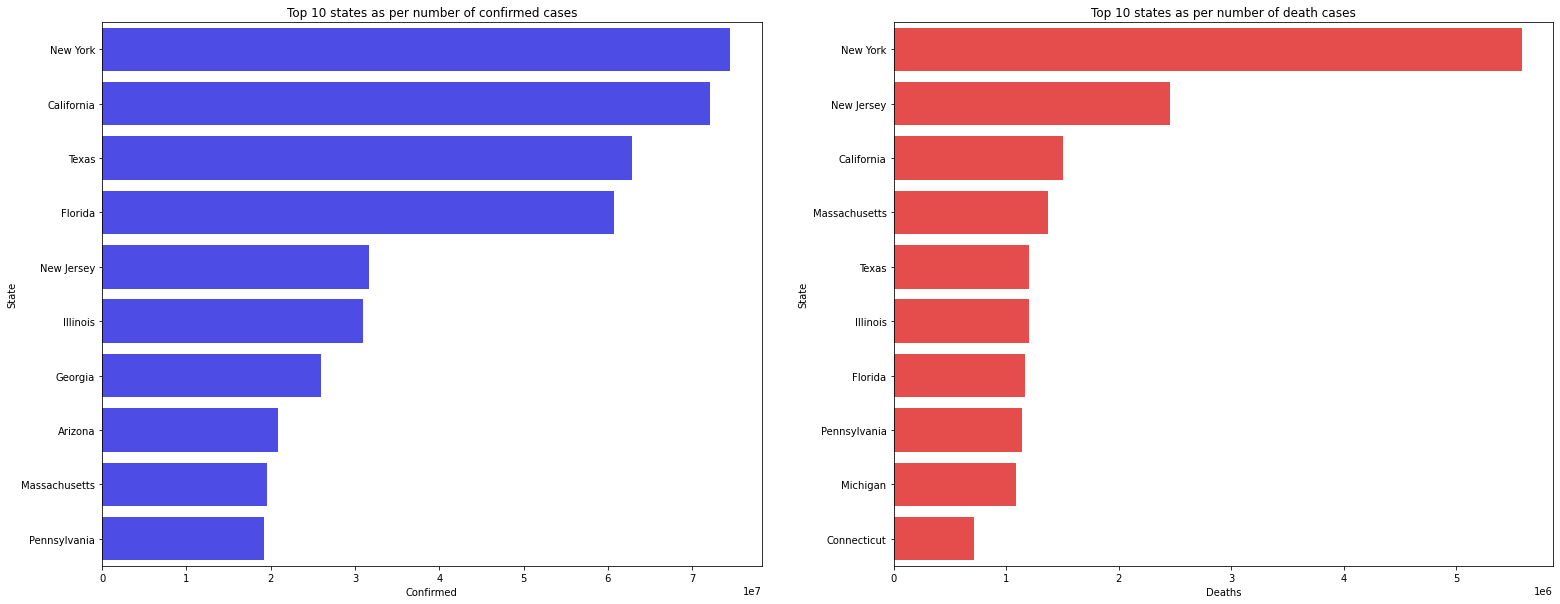

In [44]:
fig3, (ax1,ax2) = plt.subplots(1,2,figsize=(26,10))
top_10confirmed_us = us_states.sort_values(["Confirmed"],ascending=False).head(10)
top_10deaths_us = us_states.sort_values(["Deaths"],ascending=False).head(10)

sns.barplot(x=top_10confirmed_us["Confirmed"], y=top_10confirmed_us["State"],color='b',alpha=0.8, ax=ax1)
ax1.set_title("Top 10 states as per number of confirmed cases")

sns.barplot(x=top_10deaths_us["Deaths"], y=top_10deaths_us["State"],color='r',alpha=0.8, ax=ax2)
ax2.set_title("Top 10 states as per number of death cases")
fig3.savefig("us_confirm_death.png")

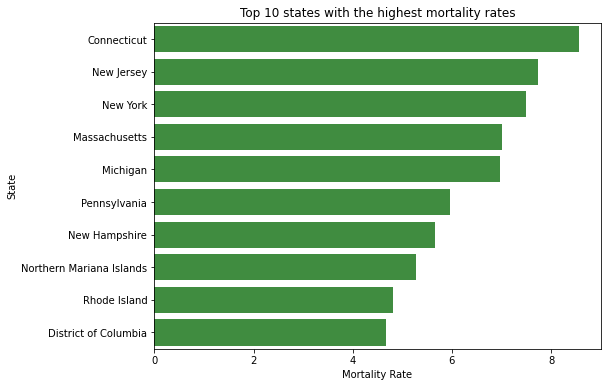

In [45]:
fig4, (ax1) = plt.subplots(1,figsize=(8,6))
top_10MotalityRate_us = us_states.sort_values(["MotalityRate"],ascending=False).head(10)
sns.barplot(x=top_10MotalityRate_us["MotalityRate"], y=top_10MotalityRate_us["State"],color='g',alpha=0.8,ax=ax1)
ax1.set_title("Top 10 states with the highest mortality rates")
ax1.set(xlabel='Mortality Rate', ylabel='State')
fig4.savefig("img/us_confirm_death.png")